<a href="https://colab.research.google.com/github/nganthee/SleepTracker/blob/main/Thi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
application_data = pd.read_csv('application_data.csv', encoding='ISO-8859-1')
columns_description = pd.read_csv('columns_description.csv', encoding='ISO-8859-1')
previous_application = pd.read_csv('previous_application.csv', encoding='ISO-8859-1')

# Display the first few rows of each file to verify successful reading
print(application_data.head())
print(columns_description.head())
print(previous_application.head())


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [ ]:
# Check for missing values
print("Missing values in application_data:\n", application_data.isnull().sum())
print("Missing values in previous_application:\n", previous_application.isnull().sum())
print("Missing values in columns_description:\n", columns_description.isnull().sum())

Missing values in application_data:
 SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
Missing values in previous_application:
 SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               

In [ ]:
# Basic summary statistics
print("Application Data Summary:\n", application_data.describe())
print("Previous Application Data Summary:\n", previous_application.describe())
print("Columns_description Data Summary:\n", columns_description.describe())

Application Data Summary:
           SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+

In [ ]:
# Drop columns with more than 50% missing values
threshold = len(application_data) * 0.5
application_data_cleaned = application_data.dropna(thresh=threshold, axis=1)
previous_application_cleaned = previous_application.dropna(thresh=threshold, axis=1)

print("Shape after dropping columns with too many missing values:")
print(application_data_cleaned.shape)
print(previous_application_cleaned.shape)

Shape after dropping columns with too many missing values:
(307511, 81)
(1670214, 35)


In [ ]:
# Fill missing numeric values with the median
numeric_cols = application_data.select_dtypes(include=['float64', 'int64']).columns
application_data[numeric_cols] = application_data[numeric_cols].fillna(application_data[numeric_cols].median())

previous_numeric_cols = previous_application.select_dtypes(include=['float64', 'int64']).columns
previous_application[previous_numeric_cols] = previous_application[previous_numeric_cols].fillna(previous_application[previous_numeric_cols].median())


In [ ]:
# Fill missing categorical values with the mode
categorical_cols = application_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    application_data[col].fillna(application_data[col].mode()[0], inplace=True)

previous_categorical_cols = previous_application.select_dtypes(include=['object']).columns
for col in previous_categorical_cols:
    previous_application[col].fillna(previous_application[col].mode()[0], inplace=True)

NameError: name 'application_data' is not defined

In [ ]:
# Check for any remaining missing values
print("Missing values in application_data after filling:\n", application_data.isnull().sum().sum())
print("Missing values in previous_application after filling:\n", previous_application.isnull().sum().sum())

Missing values in application_data after filling:
 0
Missing values in previous_application after filling:
 0


In [ ]:
# Check for missing descriptions
missing_descriptions = columns_description[columns_description['Description'].isnull()]
print("Missing descriptions:\n", missing_descriptions)


Missing descriptions:
 Empty DataFrame
Columns: [Unnamed: 0, Table, Row, Description, Special]
Index: []


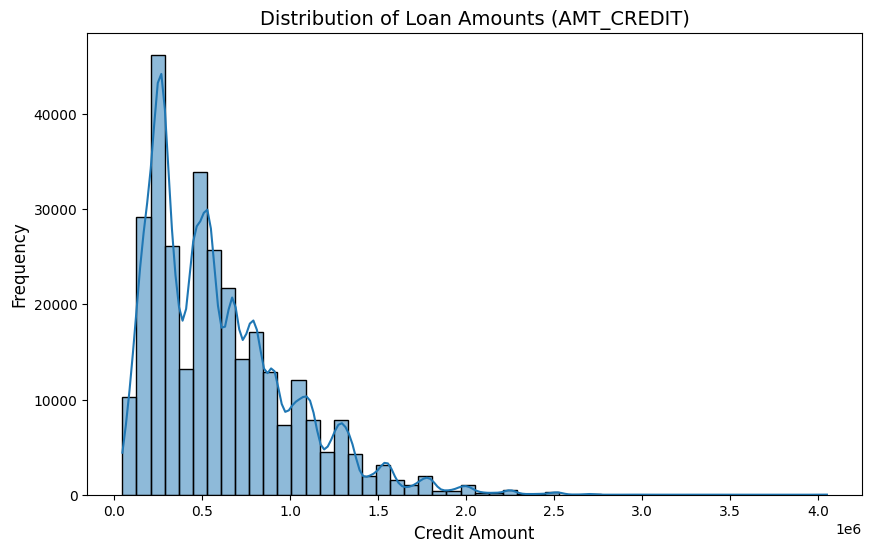

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of AMT_CREDIT
plt.figure(figsize=(10, 6))
sns.histplot(application_data['AMT_CREDIT'], bins=50, kde=True)
plt.title('Distribution of Loan Amounts (AMT_CREDIT)', fontsize=14)
plt.xlabel('Credit Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

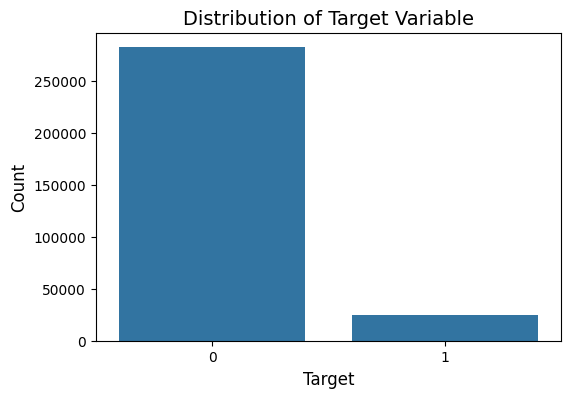

In [ ]:
# Plot the distribution of the TARGET variable
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=application_data)
plt.title('Distribution of Target Variable', fontsize=14)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

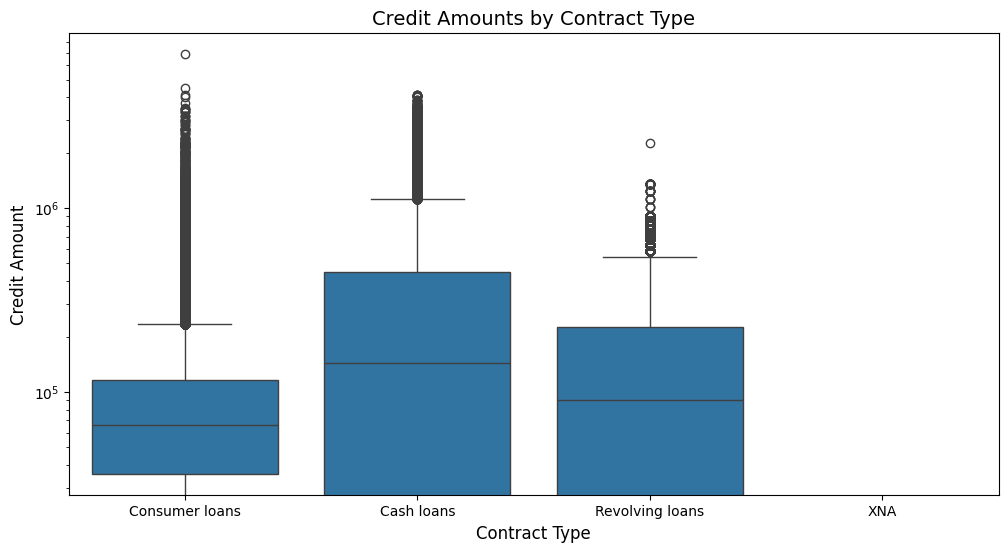

In [ ]:
# Plot the credit amount by contract type
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=previous_application)
plt.title('Credit Amounts by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Credit Amount', fontsize=12)
plt.yscale('log')
plt.show()

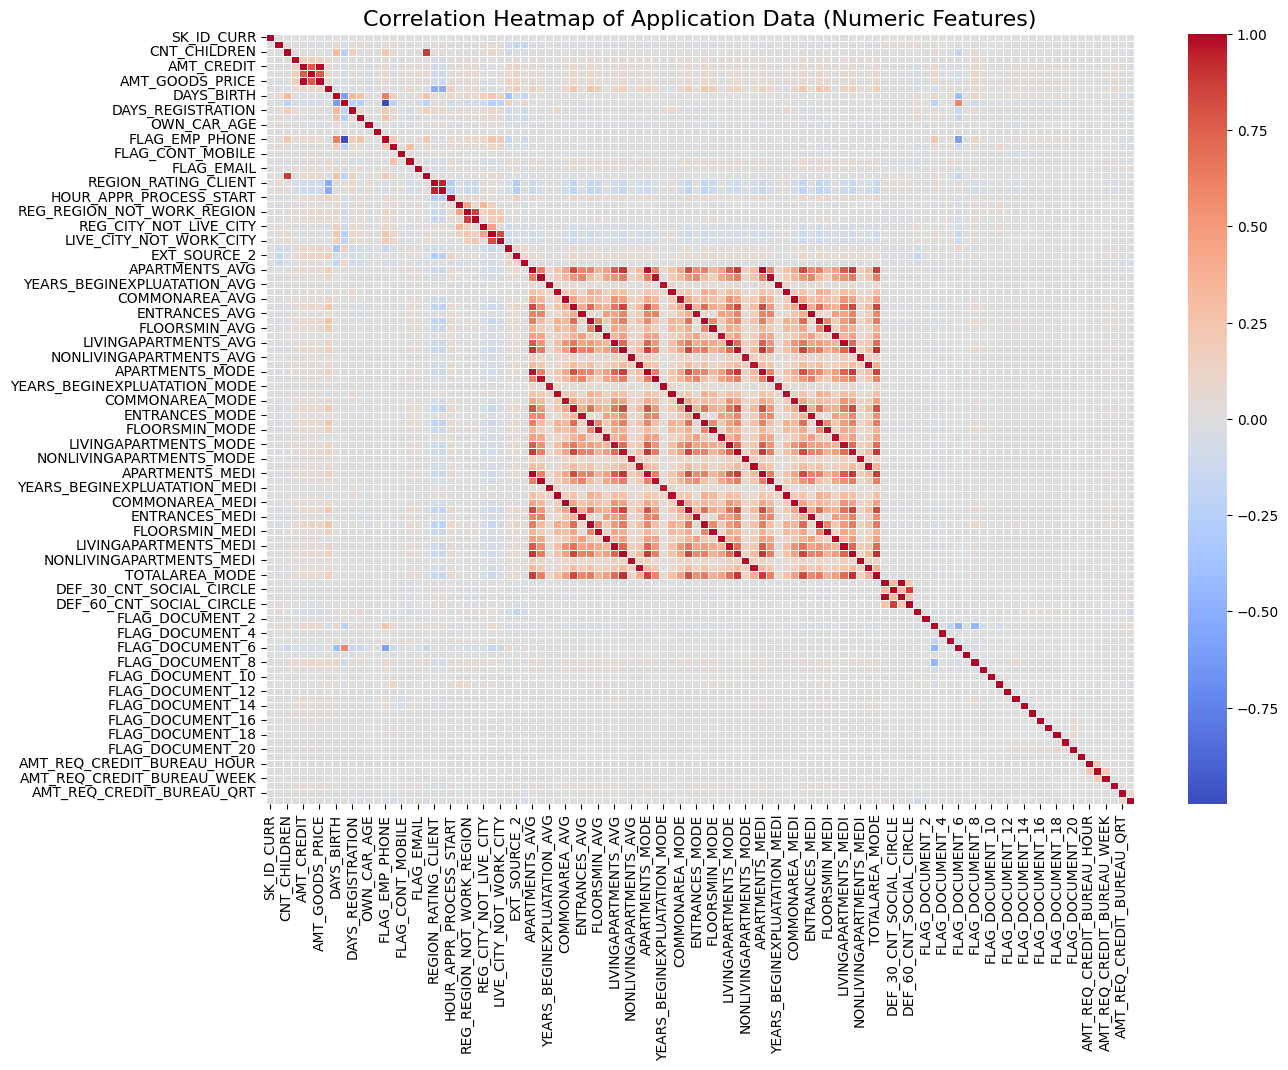

In [ ]:
# Correlation Heatmap
# Select only numeric columns for the correlation heatmap
numeric_data = application_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Application Data (Numeric Features)', fontsize=16)
plt.show()


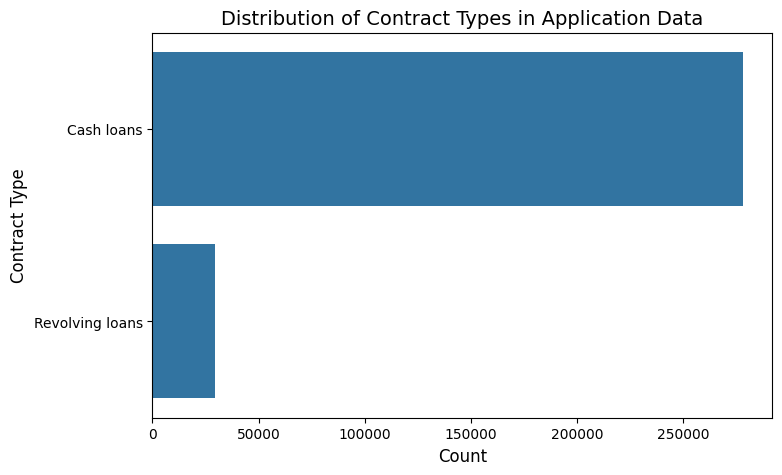

In [ ]:
#Visualize Categorical Data with Count Plots
# Plot the distribution of contract types in the application_data dataset
plt.figure(figsize=(8, 5))
sns.countplot(y='NAME_CONTRACT_TYPE', data=application_data, order=application_data['NAME_CONTRACT_TYPE'].value_counts().index)
plt.title('Distribution of Contract Types in Application Data', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Contract Type', fontsize=12)
plt.show()


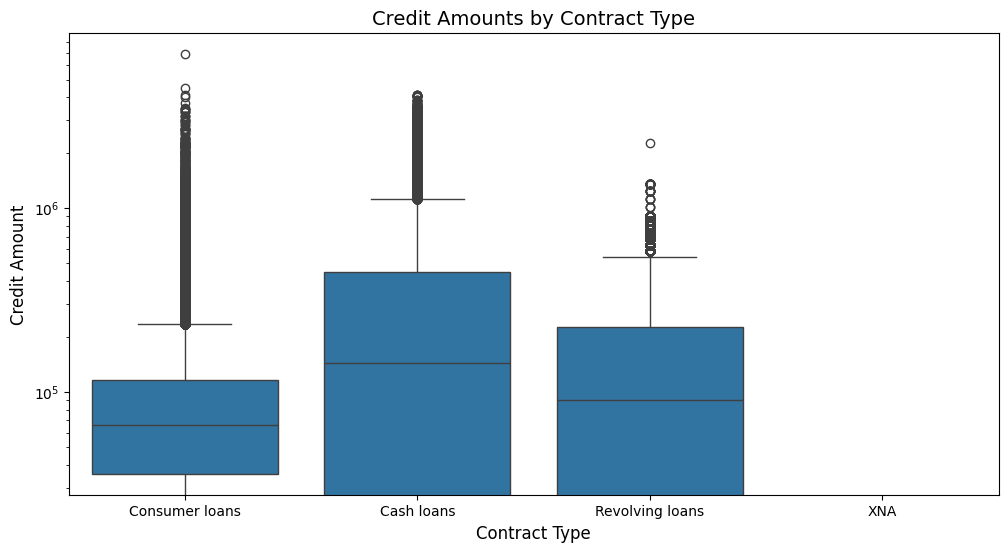

In [ ]:
# Box Plot Analysis of Loan Amounts by Contract Type
# Ensure 'AMT_CREDIT' is numeric and 'NAME_CONTRACT_TYPE' is categorical
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=previous_application)
plt.title('Credit Amounts by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Credit Amount', fontsize=12)
plt.yscale('log')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the data
application_data = pd.read_csv('application_data.csv', encoding='ISO-8859-1')
previous_application = pd.read_csv('previous_application.csv', encoding='ISO-8859-1')

# Merge datasets on a common column if necessary, e.g., customer ID
# merged_data = pd.merge(application_data, previous_application, on='SK_ID_CURR', how='left')

# Select features and target
X = application_data.drop(['TARGET'], axis=1)  # assuming TARGET is the fraud indicator
y = application_data['TARGET']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale numeric features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84845
           1       1.00      0.92      0.96     84767

    accuracy                           0.96    169612
   macro avg       0.96      0.96      0.96    169612
weighted avg       0.96      0.96      0.96    169612

Confusion Matrix:
 [[84564   281]
 [ 6921 77846]]
AUC-ROC: 0.986283775748877


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
